<a href="https://colab.research.google.com/github/brian-ho/mde-preterm-2024/blob/main/day_1/notebooks/View_images_and_access_information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# View images and access information: basic file browsing and image operations

```
2024 MDE Preterm
Brian Ho - brian@brian-ho.io
Jenny Fan - me@jennyfan.com
```

Some code to show how you can work with image files using using [PIL](https://pillow.readthedocs.io/en/stable/).

- Iterating over images with `os.listdir()`
- Viewing an image
- Viewing EXIF metadata

In [31]:
# Let's import our dependencies.
import os
from PIL import Image, ImageFilter, ImageEnhance, ImageOps
from PIL.ExifTags import TAGS, GPSTAGS, IFD, Base
from pathlib import Path

In [3]:
# This gives us a set of image file extensions so we can identify the right files
IMAGE_FILE_EXTENSIONS = {
    ex.lower() for ex, f in Image.registered_extensions().items() if f in Image.OPEN
}

In [ ]:
# When running on Colab, we can connect to a Google Drive folder
from google.colab import drive

drive.mount("/content/drive")

In [4]:
# Update the text in quotes with the path to your image data on Google Drive
# This will probably be something like: "/content/drive/MyDrive/path/to/folder"
# Don't forget to run this cell!
directory = "example_data"

In [5]:
# Now you can access the files in that folder
print(f'Listing files in "{directory}" ...')
for filepath in sorted(os.listdir(directory)):
    print(f" - {filepath}", end=""),

    # This filters out any unsupported non-image files
    if any(filepath.lower().endswith(ext) for ext in IMAGE_FILE_EXTENSIONS):
        print("... is an image!")
    else:
        print("... is not an image : (")

Listing files in "example_data" ...
 - .DS_Store... is not an image : (
 - IMG_5959.jpg... is an image!
 - image_001.jpeg... is an image!
 - image_002.jpeg... is an image!
 - image_003.jpeg... is an image!
 - image_004.jpeg... is an image!
 - image_005.jpeg... is an image!
 - image_006.jpeg... is an image!
 - image_007.jpeg... is an image!
 - image_008.jpeg... is an image!
 - image_009.jpeg... is an image!
 - image_010.jpeg... is an image!
 - image_011.jpeg... is an image!
 - image_012.jpeg... is an image!
 - image_013.jpeg... is an image!
 - image_014.jpeg... is an image!
 - image_015.jpeg... is an image!
 - image_016.jpeg... is an image!
 - image_017.jpeg... is an image!
 - image_018.jpeg... is an image!
 - image_019.jpeg... is an image!
 - image_020.jpeg... is an image!
 - image_021.jpeg... is an image!
 - image_022.jpeg... is an image!
 - image_023.jpeg... is an image!
 - image_024.jpeg... is an image!
 - image_025.jpeg... is an image!
 - image_026.jpeg... is an image!
 - image_027

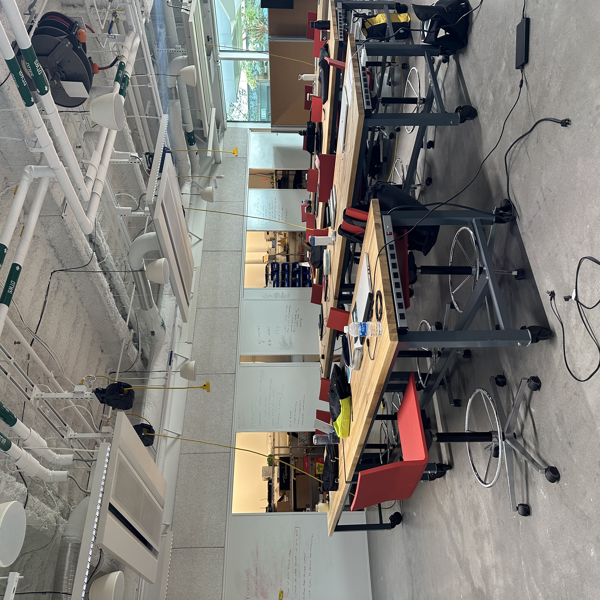

In [25]:
# Let's view the last file in the directory
# This creates a PIL Image object we can open
img = Image.open(Path(directory) / "IMG_5959.jpg")

# View the image at defined size
img_small = img.resize((600, 600))
img_small

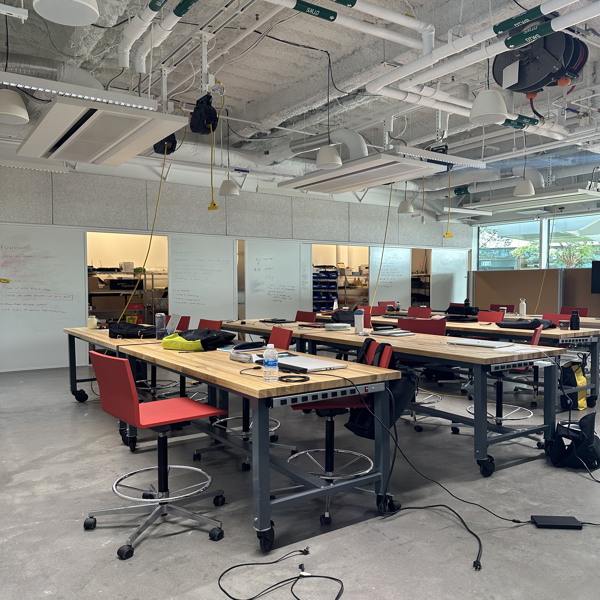

In [26]:
# We can rotate the image
img_small = img_small.rotate(-90)
img_small

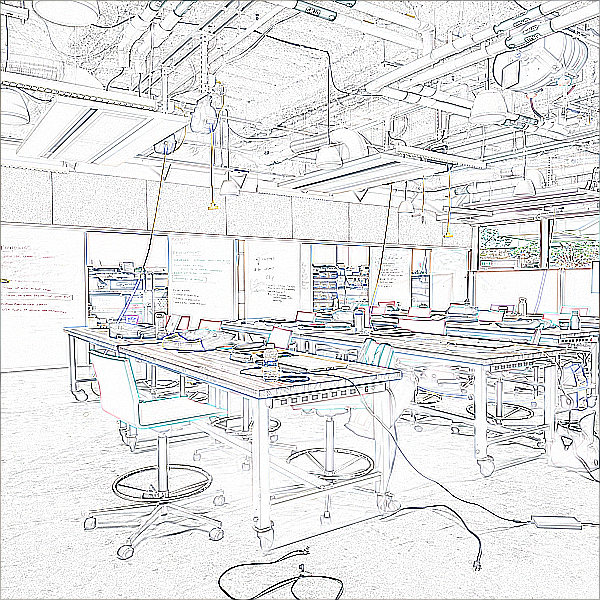

In [27]:
# We can perform filters on the image
img_small.filter(ImageFilter.CONTOUR)

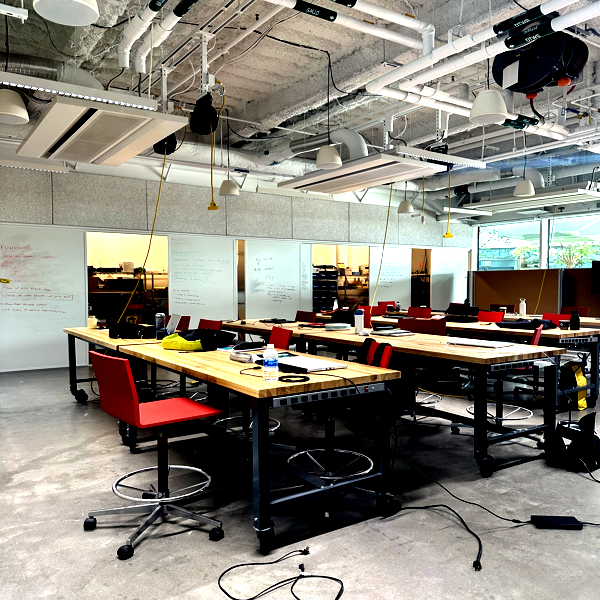

In [30]:
# We can perform enhancements on the image
ImageEnhance.Contrast(img_small).enhance(2.0)

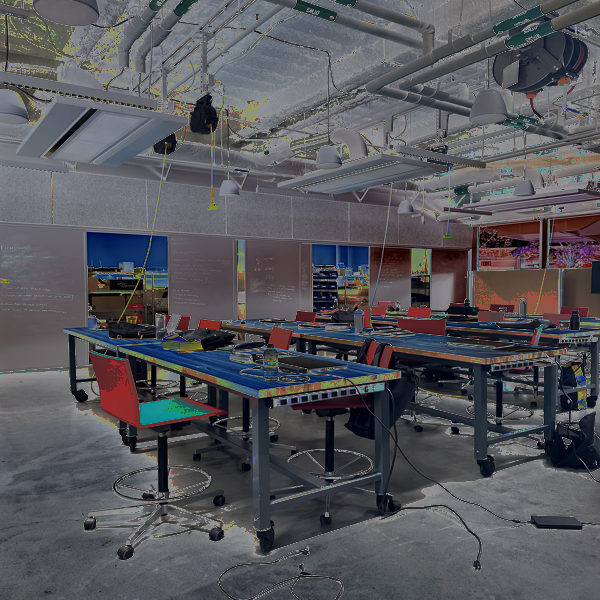

In [36]:
ImageOps.solarize(img_small, threshold=100)

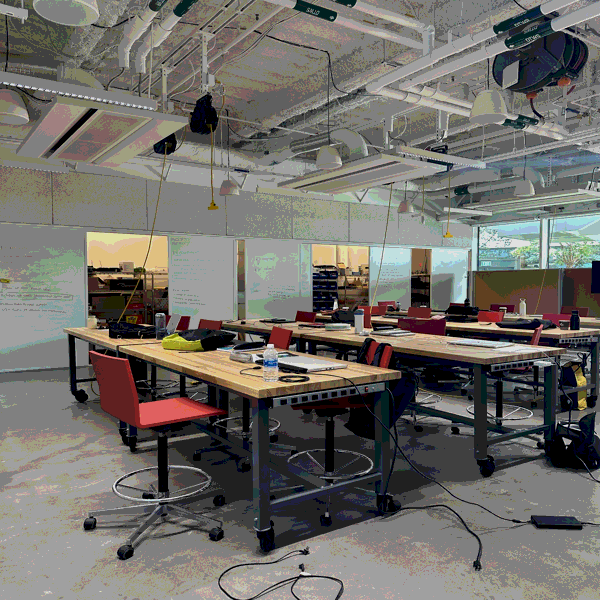

In [45]:
ImageOps.posterize(img_small, bits=3)

In [46]:
# You can also get EXIF metadata!
def print_exif_info(img_file):
    """A helper function that prints EXIF information."""

    print(f"\n===== EXIF Metadata for {img_file} =====")

    # Create a PIL Image object
    img = Image.open(img_file)

    # Get the EXIF metadata
    img_exif = img.getexif()

    # This for loop iterates over img_exif
    # img_exif is a dictionary — a set of key-value pairs
    # items() returns each pair one at a time
    for exif_tag, exif_value in img_exif.items():
        print(TAGS.get(exif_tag, exif_tag), exif_value)

    # In addition the base EXIF data, we can look for more IFDs
    # These are Image File Directories, and provide more info
    for ifd_id in IFD:
        # Not all images will have all IFDs!
        # The try here lets us view this info only if it exists
        try:
            ifd = img_exif.get_ifd(ifd_id)
            print(f"\n----- {ifd_id.name} -----")

            if ifd_id == IFD.GPSInfo:
                resolve = GPSTAGS
            else:
                resolve = TAGS

            for tag, value in ifd.items():
                tag_name = resolve.get(tag, tag)
                print(tag_name, value)

        except KeyError:
            pass

In [47]:
# Let's try to view the EXIF data for an image
print_exif_info(Path(directory) / "IMG_5959.jpg")


===== EXIF Metadata for example_data/IMG_5959.jpg =====
GPSInfo 2696
ResolutionUnit 2
ExifOffset 236
Make Apple
Model iPhone 14 Pro
Software 17.5.1
Orientation 6
DateTime 2024:08:13 11:35:30
YCbCrPositioning 1
XResolution 72.0
YResolution 72.0
HostComputer iPhone 14 Pro

----- Exif -----
ExifVersion b'0232'
ComponentsConfiguration b'\x01\x02\x03\x00'
ShutterSpeedValue 6.230912112620979
DateTimeOriginal 2024:08:13 11:35:30
DateTimeDigitized 2024:08:13 11:35:30
ApertureValue 1.663754482562451
BrightnessValue 2.654007199000955
ExposureBiasValue 0.0
MeteringMode 5
Flash 16
FocalLength 6.86
ColorSpace 65535
ExifImageWidth 4032
FocalLengthIn35mmFilm 24
SceneCaptureType 0
OffsetTime -04:00
OffsetTimeOriginal -04:00
OffsetTimeDigitized -04:00
SubsecTimeOriginal 690
SubjectLocation (2011, 1508, 2323, 1330)
SubsecTimeDigitized 690
ExifImageHeight 3024
SensingMethod 2
ExposureTime 0.013333333333333334
FNumber 1.78
SceneType b'\x01'
ExposureProgram 2
ISOSpeedRatings 160
ExposureMode 0
FlashPixVer